# 📊 Customer Churn Prediction Using Machine Learning

This project aims to predict customer churn using supervised machine-learning techniques. By preprocessing the data and applying SMOTE to address class imbalance, we build and evaluate several models including Logistic Regression, Decision Trees, Random Forest, SVM, KNN, and XGBoost. Using GridSearchCV for hyperparameter tuning and F1-score as the evaluation metric, we identify the most effective model to help businesses take proactive measures in customer retention.


### Importing the dataset and installing the necessary libraries 

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

In [3]:
path = kagglehub.dataset_download("jpacse/datasets-for-churn-telecom")
print("Path to the dataset files: ", path)

Path to the dataset files:  C:\Users\rachn\.cache\kagglehub\datasets\jpacse\datasets-for-churn-telecom\versions\2


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


In [5]:
import warnings
warnings.filterwarnings("ignore")

### Loading and exploring the dataset



In [6]:
churn = pd.read_csv(path + "/cell2celltrain.csv")

In [7]:
churn.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [8]:
churn.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [9]:
churn.shape

(51047, 58)

### Checking for any NULL values in the dataset

In [10]:
churn.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [11]:
churn.isna().sum().sum()

3515

### Understanding the columns and their datatypes to deal with the NULL values accordingly

In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

### Data Cleaning and Missing Value Treatment

To prepare the dataset for modeling, we handled missing values as follows:
- **Numerical columns** (e.g., `MonthlyRevenue`, `TotalRecurringCharge`, `RoamingCalls`) were filled using the **mean** of each column.
- **Categorical columns** like `ServiceArea` were filled using the **mode** (most frequent value).
- **Age-related columns** (`AgeHH1`, `AgeHH2`) were also filled with the **mode**, since they may not follow a normal distribution.
- Rows missing critical categorical values such as `Handsets`, `HandsetModels`, and `CurrentEquipmentDays` were **dropped** instead of imputed to avoid introducing bias.
- Finally, we verified that no missing values remain in the dataset.

This ensures the data is clean and consistent for the next steps.


In [13]:
churn['MonthlyRevenue'] = churn['MonthlyRevenue'].fillna(value = churn['MonthlyRevenue'].mean())
churn['MonthlyMinutes'] = churn['MonthlyMinutes'].fillna(value = churn['MonthlyMinutes'].mean())
churn['TotalRecurringCharge'] = churn['TotalRecurringCharge'].fillna(value = churn['TotalRecurringCharge'].mean())
churn['DirectorAssistedCalls'] = churn['DirectorAssistedCalls'].fillna(value = churn['DirectorAssistedCalls'].mean())
churn['OverageMinutes'] = churn['OverageMinutes'].fillna(value = churn['OverageMinutes'].mean())
churn['RoamingCalls'] = churn['RoamingCalls'].fillna(value = churn['RoamingCalls'].mean())
churn['PercChangeMinutes'] = churn['PercChangeMinutes'].fillna(value = churn['PercChangeMinutes'].mean())
churn['PercChangeRevenues'] = churn['PercChangeRevenues'].fillna(value = churn['PercChangeRevenues'].mean())
churn['AgeHH1'] = churn['AgeHH1'].fillna(value = churn['AgeHH1'].mode()[0])
churn['AgeHH2'] = churn['AgeHH2'].fillna(value = churn['AgeHH2'].mode()[0])

In [14]:
churn['ServiceArea'] = churn['ServiceArea'].fillna(value = churn['ServiceArea'].mode()[0])

In [15]:
churn['AgeHH1'].unique()

array([62., 40., 26., 30., 46., 28., 52., 36.,  0., 58., 99., 48., 42.,
       74., 50., 64., 72., 44., 76., 54., 38., 68., 56., 32., 60., 34.,
       88., 70., 80., 82., 24., 66., 22., 78., 84., 20., 94., 86., 90.,
       18., 92., 98., 96.])

In [16]:
churn = churn.dropna(subset=['Handsets', 'HandsetModels', 'CurrentEquipmentDays'])

In [17]:
churn.isna().sum().sum()

0

### Data Preprocessing: Encoding Categorical Variables

In this step, categorical features are converted into numerical format to make the data suitable for machine learning models.

In [18]:
churn['HasCreditCard'].value_counts()

HasCreditCard
Yes    34503
No     16543
Name: count, dtype: int64

In [19]:
churn['HasCreditCard'] = churn['HasCreditCard'].map(lambda x : 1 if x == 'Yes' else 0)

In [20]:
churn['HasCreditCard'].value_counts()

HasCreditCard
1    34503
0    16543
Name: count, dtype: int64

In [21]:
churn['NewCellphoneUser'].value_counts()

NewCellphoneUser
No     41222
Yes     9824
Name: count, dtype: int64

In [22]:
churn['NewCellphoneUser'] = churn['NewCellphoneUser'].map(lambda x : 1 if x == 'Yes' else 0)

In [23]:
churn['NewCellphoneUser'].value_counts()

NewCellphoneUser
0    41222
1     9824
Name: count, dtype: int64

In [24]:
churn['Churn'] = churn['Churn'].map(lambda x : 1 if x == 'Yes' else 0)
churn['HandsetRefurbished']=churn['HandsetRefurbished'].map(lambda x : 1 if x=='Yes' else 0)
churn['HandsetWebCapable']=churn['HandsetWebCapable'].map(lambda x : 1 if x=='Yes' else 0)
churn['ChildrenInHH']=churn['ChildrenInHH'].map(lambda x : 1 if x=='Yes' else 0)
churn['RVOwner']=churn['RVOwner'].map(lambda x : 1 if x=='Yes' else 0) 
churn['TruckOwner']=churn['TruckOwner'].map(lambda x : 1 if x=='Yes' else 0) 
churn['BuysViaMailOrder']=churn['BuysViaMailOrder'].map(lambda x : 1 if x=='Yes' else 0)
churn['RespondsToMailOffers']=churn['RespondsToMailOffers'].map(lambda x : 1 if x=='Yes' else 0)
churn['OptOutMailings']=churn['OptOutMailings'].map(lambda x : 1 if x=='Yes' else 0)
churn['NonUSTravel']=churn['NonUSTravel'].map(lambda x : 1 if x=='Yes' else 0)
churn['OwnsComputer']=churn['OwnsComputer'].map(lambda x : 1 if x=='Yes' else 0)
churn['OwnsMotorcycle']=churn['OwnsMotorcycle'].map(lambda x : 1 if x=='Yes' else 0)
churn['MadeCallToRetentionTeam']=churn['MadeCallToRetentionTeam'].map(lambda x : 1 if x=='Yes' else 0)
churn['MaritalStatus'] = churn['MaritalStatus'].map(lambda x : 1 if x == 'Yes' else 0)

In [25]:
churn['CreditRating'].value_counts()

CreditRating
2-High       18992
1-Highest     8522
3-Good        8410
5-Low         6499
4-Medium      5357
7-Lowest      2114
6-VeryLow     1152
Name: count, dtype: int64

In [26]:
creditRatingScores = {'1-Highest':1, '2-High':2, '3-Good':3, '4-Medium':4, '5-Low':5, '6-VeryLow':6, '7-Lowest':7}
churn['CreditRating'] = churn['CreditRating'].map(creditRatingScores)

In [27]:
churn['CreditRating'].value_counts()

CreditRating
2    18992
1     8522
3     8410
5     6499
4     5357
7     2114
6     1152
Name: count, dtype: int64

### Data Preprocessing: Creating Dummy Variables

To handle categorical data like Occupation and Prizm_Code, we created dummy variables using one-hot encoding. This process converts each category into a separate binary column (0 or 1), making the data suitable for machine learning models. We used `drop_first=True` to avoid multicollinearity by excluding one category from each set of dummies.


In [28]:
churn['Occupation'].value_counts()

Occupation
Other           37636
Professional     8755
Crafts           1519
Clerical          986
Self              879
Retired           733
Student           381
Homemaker         157
Name: count, dtype: int64

In [29]:
churn = pd.get_dummies(churn, columns=['Occupation'], drop_first=True)

In [30]:
churn

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,CreditRating,PrizmCode,MaritalStatus,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,1,Suburban,0,False,False,False,True,False,False,False
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,4,Suburban,1,False,False,False,True,False,False,False
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,3,Town,1,True,False,False,False,False,False,False
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,4,Other,0,False,False,True,False,False,False,False
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,1,Other,1,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,1,Suburban,1,False,False,True,False,False,False,False
51043,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,3,Other,0,False,False,True,False,False,False,False
51044,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,5,Other,0,False,False,False,False,False,False,False
51045,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,5,Other,0,False,False,True,False,False,False,False


In [31]:
true_false = {True : 1, False : 0}

In [32]:
churn['Occupation_Homemaker'] = churn['Occupation_Homemaker'].map(true_false)

In [33]:
churn.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,CreditRating,PrizmCode,MaritalStatus,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,1,Suburban,0,False,0,False,True,False,False,False
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,4,Suburban,1,False,0,False,True,False,False,False
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,3,Town,1,True,0,False,False,False,False,False
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,4,Other,0,False,0,True,False,False,False,False
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,1,Other,1,False,0,False,True,False,False,False


In [34]:
churn['Occupation_Crafts'] = churn['Occupation_Crafts'].map(true_false)
churn['Occupation_Other'] = churn['Occupation_Other'].map(true_false)
churn['Occupation_Professional'] = churn['Occupation_Professional'].map(true_false)
churn['Occupation_Retired'] = churn['Occupation_Retired'].map(true_false)
churn['Occupation_Self'] = churn['Occupation_Self'].map(true_false)
churn['Occupation_Student'] = churn['Occupation_Student'].map(true_false)

In [35]:
churn.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,CreditRating,PrizmCode,MaritalStatus,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,1,Suburban,0,0,0,0,1,0,0,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,4,Suburban,1,0,0,0,1,0,0,0
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,3,Town,1,1,0,0,0,0,0,0
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,4,Other,0,0,0,1,0,0,0,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,1,Other,1,0,0,0,1,0,0,0


In [36]:
churn['PrizmCode'].value_counts()

PrizmCode
Other       24654
Suburban    16378
Town         7589
Rural        2425
Name: count, dtype: int64

In [37]:
churn = pd.get_dummies(churn, columns=['PrizmCode'], drop_first=True)

In [38]:
churn

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,0,0,1,0,0,0,False,True,False
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,0,0,1,0,0,0,False,True,False
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,1,0,0,0,0,0,0,False,False,True
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,0,1,0,0,0,0,False,False,False
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,0,0,1,0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,0,1,0,0,0,0,False,True,False
51043,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,0,1,0,0,0,0,False,False,False
51044,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,0,0,0,0,0,0,False,False,False
51045,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,0,1,0,0,0,0,False,False,False


In [39]:
churn['PrizmCode_Rural'] = churn['PrizmCode_Rural'].map(true_false)
churn['PrizmCode_Suburban'] = churn['PrizmCode_Suburban'].map(true_false)
churn['PrizmCode_Town'] = churn['PrizmCode_Town'].map(true_false)

In [41]:
churn

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,0,0,1,0,0,0,0,1,0
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,0,1,0,0,0,0,0,0,0
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,0,1,0,0,0,0,0,1,0
51043,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,0,1,0,0,0,0,0,0,0
51044,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,0,0,0,0,0,0,0,0,0
51045,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,0,1,0,0,0,0,0,0,0


### Dropping Irrelevant or Redundant Columns

The below columns had a huge imbalance of Unknown values, hence they were dropped. This helps reduce noise and potential multicollinearity, improving model performance and interpretability.

In [42]:
churn=churn.drop('ServiceArea', axis=1)
churn=churn.drop('NotNewCellphoneUser', axis=1) 
churn=churn.drop('Homeownership', axis=1)
churn=churn.drop('HandsetPrice', axis=1)

### Dataset Overview After Cleaning

We review the structure of the cleaned dataset to ensure it's ready for modeling:
- Rename it to df and confirm the number of entries and columns.
- Verify data types and ensure there are no missing values.
- Ensure all columns are now in a suitable numeric format for machine learning models.

In [43]:
df=churn

In [44]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,0,0,1,0,0,0,0,1,0
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,0,1,0,0,0,0,0,0,0
4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,0,1,0,0,0,0,0,1,0
51043,3399974,0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,0,1,0,0,0,0,0,0,0
51044,3399978,1,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,0,0,0,0,0,0,0,0,0
51045,3399990,0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,0,0,1,0,0,0,0,0,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51046 entries, 0 to 51046
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51046 non-null  int64  
 1   Churn                      51046 non-null  int64  
 2   MonthlyRevenue             51046 non-null  float64
 3   MonthlyMinutes             51046 non-null  float64
 4   TotalRecurringCharge       51046 non-null  float64
 5   DirectorAssistedCalls      51046 non-null  float64
 6   OverageMinutes             51046 non-null  float64
 7   RoamingCalls               51046 non-null  float64
 8   PercChangeMinutes          51046 non-null  float64
 9   PercChangeRevenues         51046 non-null  float64
 10  DroppedCalls               51046 non-null  float64
 11  BlockedCalls               51046 non-null  float64
 12  UnansweredCalls            51046 non-null  float64
 13  CustomerCareCalls          51046 non-null  float64


### Exploratory Data Analysis (EDA)

We explore key features through visualizations to understand the data better:

- **Churn Count:** A bar chart showing class imbalance, with more customers not churning than churning.
- **Monthly Revenue:** A histogram showing revenue distribution, which appears right-skewed with many low-revenue customers.
- **PrizmCode Distribution:** A pie chart visualizing customer segmentation based on geographic or demographic classification.

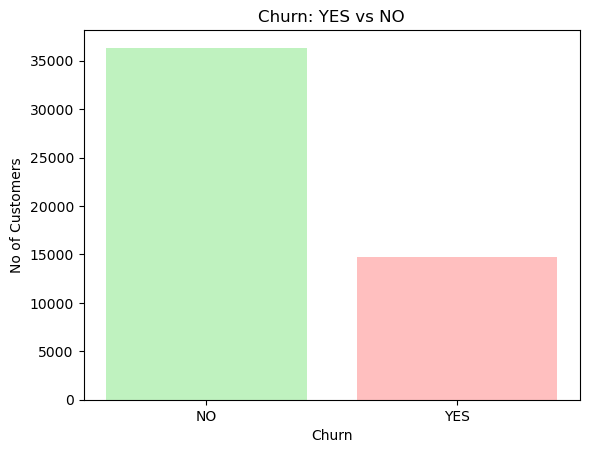

In [47]:
churn_count=df['Churn'].value_counts()
labels = ['NO', 'YES']
values=[churn_count.get(0,0), churn_count.get(1,0)]
color=[(0.75, 0.95, 0.75), (1.0, 0.75, 0.75)]

plt.bar(labels, values, color=color)
plt.xlabel('Churn')        
plt.ylabel('No of Customers')
plt.title('Churn: YES vs NO')
plt.show()        

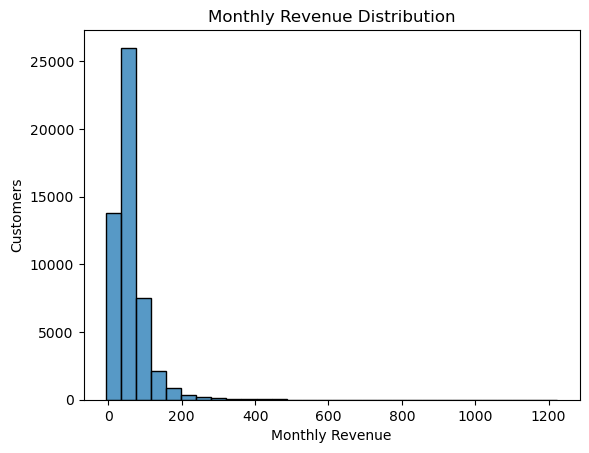

In [48]:
sns.histplot(data=df, x='MonthlyRevenue', bins=30)
plt.title("Monthly Revenue Distribution")
plt.xlabel("Monthly Revenue")
plt.ylabel("Customers")
   
plt.show()

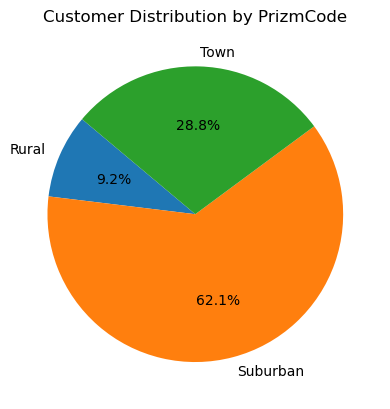

In [49]:
prizm_cols = [col for col in df.columns if col.startswith("PrizmCode_")]
prizm_counts = df[prizm_cols].sum()
prizm_counts.index = prizm_counts.index.str.replace("PrizmCode_", "")

plt.pie(prizm_counts, labels=prizm_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Customer Distribution by PrizmCode")

plt.show()

### Balancing the Dataset with SMOTE

To address class imbalance in the churn variable, we applied **SMOTE (Synthetic Minority Over-sampling Technique)**. This technique generates synthetic examples of the minority class to create a more balanced dataset.

The resulting distribution confirms that both churned and non-churned classes now have equal representation, which helps improve the fairness and accuracy of classification models.


In [54]:
X = df.drop(['Churn', 'CustomerID'], axis=1)  
y = df['Churn']
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


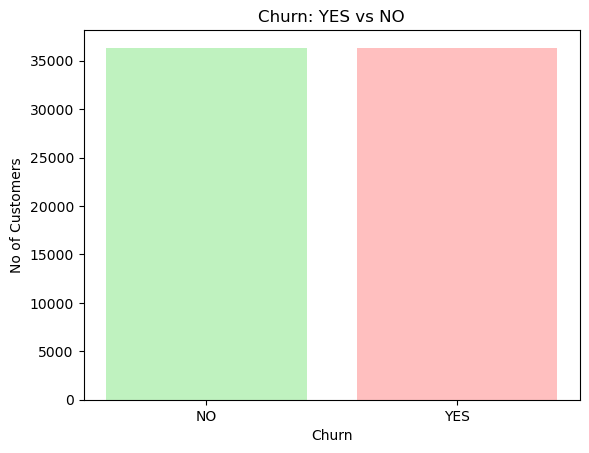

In [55]:
churn_count=y_resampled.value_counts()
labels = ['NO', 'YES']
values=[churn_count.get(0,0), churn_count.get(1,0)]
color=[(0.75, 0.95, 0.75), (1.0, 0.75, 0.75)]

plt.bar(labels, values, color=color)
plt.xlabel('Churn')        
plt.ylabel('No of Customers')
plt.title('Churn: YES vs NO')
plt.show()        

### Model Training & Evaluation (Multiple Classifiers)

We trained several classification models to predict customer churn and compared their performance on the test set using accuracy, precision, recall, and F1-score.

- **Logistic Regression:** A simple linear model useful for baseline binary classification. 

In [57]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("🔸 Logistic Regression Report:")
print(classification_report(y_test, log_pred))

🔸 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      7323
           1       0.68      0.66      0.67      7211

    accuracy                           0.68     14534
   macro avg       0.68      0.68      0.68     14534
weighted avg       0.68      0.68      0.68     14534



- **Support Vector Classifier (SVC):** Finds the optimal hyperplane to separate classes. May underperform on large or noisy datasets without kernel tuning.

In [58]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("🔸 SVM Report:")
print(classification_report(y_test, svm_pred))

🔸 SVM Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57      7323
           1       0.58      0.62      0.60      7211

    accuracy                           0.58     14534
   macro avg       0.59      0.58      0.58     14534
weighted avg       0.59      0.58      0.58     14534



- **Decision Tree:** A rule-based, interpretable model that can handle non-linear patterns.

In [59]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("🔸 Decision Tree Report:")
print(classification_report(y_test, tree_pred))


🔸 Decision Tree Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      7323
           1       0.69      0.71      0.70      7211

    accuracy                           0.70     14534
   macro avg       0.70      0.70      0.70     14534
weighted avg       0.70      0.70      0.70     14534



- **Naive Bayes:** A probabilistic model based on Bayes' theorem. Performs well with high-dimensional categorical data but assumes feature independence.

In [60]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("🔹 Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred))

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))

🔹 Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.67      0.39      0.49      7323
           1       0.57      0.81      0.67      7211

    accuracy                           0.60     14534
   macro avg       0.62      0.60      0.58     14534
weighted avg       0.62      0.60      0.58     14534

🔹 Accuracy: 0.5970138984450255


### Ensemble Methods 

Ensemble methods combine the predictions of multiple base learners to produce more robust, accurate, and generalizable models. They help reduce overfitting, improve stability, and handle complex patterns better than single models.

- **Random Forest**: Builds multiple decision trees on random subsets of data and averages their outputs to reduce variance and improve stability.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6480  843]
 [2174 5037]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      7323
           1       0.86      0.70      0.77      7211

    accuracy                           0.79     14534
   macro avg       0.80      0.79      0.79     14534
weighted avg       0.80      0.79      0.79     14534



- **Gradient Boosting**: Builds models sequentially, each learning from the errors of the previous one to minimize loss and improve overall prediction.

In [61]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("🔹 Gradient Boosting Report:")
print(classification_report(y_test, gb_pred))
print("Accuracy:", accuracy_score(y_test, gb_pred))

🔹 Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      7323
           1       0.83      0.68      0.74      7211

    accuracy                           0.77     14534
   macro avg       0.78      0.77      0.77     14534
weighted avg       0.78      0.77      0.77     14534

Accuracy: 0.7697123985138297


- **XGBoost**: An optimized version of gradient boosting with regularization, parallel processing, and better handling of missing values, offering both speed and accuracy.

In [62]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("🔹 XGBoost Report:")
print(classification_report(y_test, xgb_pred))
print("Accuracy:", accuracy_score(y_test, xgb_pred))

🔹 XGBoost Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      7323
           1       0.86      0.70      0.77      7211

    accuracy                           0.79     14534
   macro avg       0.81      0.79      0.79     14534
weighted avg       0.81      0.79      0.79     14534

Accuracy: 0.794963533782854


### Hyperparameter Tuning with GridSearchCV

To optimize model performance, we use **GridSearchCV**, a technique that systematically searches through a specified set of hyperparameters using cross-validation.

- It helps find the **best combination of parameters** that maximizes a chosen scoring metric (e.g., F1-score).
- This ensures the model is **not underfitting or overfitting** and performs well on unseen data.

### 🌳 Random Forest with GridSearchCV
Random Forest builds an ensemble of decision trees using random subsets of features and data to reduce overfitting and improve generalization.  
🔧 GridSearchCV is used here to tune `n_estimators`, `max_depth`, and other parameters to maximize F1-score using cross-validation.


In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],       
    'max_depth': [None, 10, 20],          
    'min_samples_split': [2, 5],         
    'min_samples_leaf': [1, 2],           
    'bootstrap': [True, False]            
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      7323
           1       0.88      0.71      0.78      7211

    accuracy                           0.81     14534
   macro avg       0.82      0.81      0.80     14534
weighted avg       0.82      0.81      0.80     14534

Accuracy: 0.8059033989266547


### 🚀 Gradient Boosting with GridSearchCV
Gradient Boosting trains models sequentially, where each model corrects the errors of the previous one.  
🔧 We tune key hyperparameters like `learning_rate`, `n_estimators`, and `max_depth` to enhance performance and minimize bias.


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]}

grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_gb = grid_search.best_estimator_
y_pred=best_gb.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      7323
           1       0.86      0.69      0.77      7211

    accuracy                           0.79     14534
   macro avg       0.81      0.79      0.79     14534
weighted avg       0.81      0.79      0.79     14534

Accuracy: 0.7939314710334389


### 🔷 XGBoost with GridSearchCV
XGBoost is a powerful and optimized version of gradient boosting that includes regularization, handling of missing values, and parallelized computation.  
🔧 Extensive hyperparameter tuning (e.g., `gamma`, `colsample_bytree`, `scale_pos_weight`) is performed to improve both recall and F1-score.


In [78]:

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.2, 0.5],
    'scale_pos_weight': [1, 2, 3]
}



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=cv,
                           n_jobs=-1,
                           verbose=1)


grid_search.fit(X_train, y_train)


print("🔍 Best Parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)


print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
🔍 Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 1.0}
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      7267
           1       0.88      0.68      0.77      7267

    accuracy                           0.80     14534
   macro avg       0.81      0.80      0.79     14534
weighted avg       0.81      0.80      0.79     14534

✅ Accuracy: 0.7968212467318013


### 📍 K-Nearest Neighbors (KNN) with GridSearchCV
KNN classifies a point based on the majority class of its closest neighbors. It is simple yet effective for balanced datasets.  
🔧 GridSearchCV is used to identify the best `n_neighbors`, distance `metric`, and `weight` function for optimal classification performance.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],        
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan'] 
}
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70      7267
           1       0.68      0.92      0.79      7267

    accuracy                           0.75     14534
   macro avg       0.78      0.75      0.74     14534
weighted avg       0.78      0.75      0.74     14534

Accuracy: 0.7485895142424659


### 📈 Model Performance Comparison (Train vs Test)

To evaluate how well the tuned models generalize to unseen data, we compared their performance on both training and test sets using `.score()`, which returns the accuracy of the model.

In [73]:
print("Random Forest Train Score", best_rf.score(X_train, y_train))
print("Random Forest Test Score", best_rf.score(X_test, y_test))

Random Forest Train Score 0.9614696573551672
Random Forest Test Score 0.9600247695059859


In [74]:
print("GB Train Score", best_gb.score(X_train, y_train))
print("GB Test Score", best_gb.score(X_test, y_test))

GB Train Score 0.8647653777349663
GB Test Score 0.8643181505435531


In [76]:
print("XGB Train Score", best_xgb.score(X_train, y_train))
print("XGB Test Score", best_xgb.score(X_test, y_test))

XGB Train Score 0.887505160313747
XGB Test Score 0.7968212467318013


In [77]:
print("KNN Train Score", best_knn.score(X_train, y_train))
print("KNN Test Score", best_knn.score(X_test, y_test))

KNN Train Score 1.0
KNN Test Score 0.7485895142424659


### ✅ Model Performance Summary 

- **Random Forest**  
  🟢 Train Accuracy: 0.9615  
  🟢 Test Accuracy: 0.9600  
  ➤ Best overall performer with high generalization and minimal overfitting.

- **Gradient Boosting**  
  🟡 Train Accuracy: 0.8648  
  🟡 Test Accuracy: 0.8643  
  ➤ Strong performance with balanced train and test scores.

- **XGBoost**  
  🔵 Train Accuracy: 0.8875  
  🔵 Test Accuracy: 0.7968  
  ➤ Performs well, though there's a noticeable gap between train and test scores.

- **K-Nearest Neighbors (KNN)**  
  🔴 Train Accuracy: 1.0000  
  🔴 Test Accuracy: 0.7486  
  ➤ Signs of overfitting due to perfect train score and much lower test accuracy.
